In [1]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

1. 删除重复数据，并输出去重前后的数据量

In [2]:
# 去重前
print(f"去重前的数据量: {data.size}")

# 去重后
data = data.drop_duplicates()
print(f"去重后的数据量: {data.size}")

去重前的数据量: 692172
去重后的数据量: 672486


2. 缺失值处理

In [3]:
# 去掉 gravatar_id 列
del data['gravatar_id']

In [4]:
# 查看每列的缺失值数量
missing_values = data.isnull().sum()
print(missing_values)

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [5]:
data = data.fillna('')
data['hireable'] = data['hireable'].astype(bool)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19779 entries, 0 to 20348
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   actor_id             19779 non-null  int64 
 1   label                19779 non-null  object
 2   login                19779 non-null  object
 3   id                   19779 non-null  int64 
 4   node_id              19779 non-null  object
 5   avatar_url           19779 non-null  object
 6   url                  19779 non-null  object
 7   html_url             19779 non-null  object
 8   followers_url        19779 non-null  object
 9   following_url        19779 non-null  object
 10  gists_url            19779 non-null  object
 11  starred_url          19779 non-null  object
 12  subscriptions_url    19779 non-null  object
 13  organizations_url    19779 non-null  object
 14  repos_url            19779 non-null  object
 15  events_url           19779 non-null  object
 16  received_

3. 数据变换，将created_at、updated_at转为时间戳

In [7]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['created_at'] = data['created_at'].apply(lambda x: x.timestamp())
data['updated_at'] = pd.to_datetime(data['updated_at'])
data['updated_at'] = data['updated_at'].apply(lambda x: x.timestamp())
print(data['created_at'].head())

0    1.317058e+09
1    1.435573e+09
2    1.220027e+09
3    1.400611e+09
4    1.345127e+09
Name: created_at, dtype: float64


4. 数据可视化

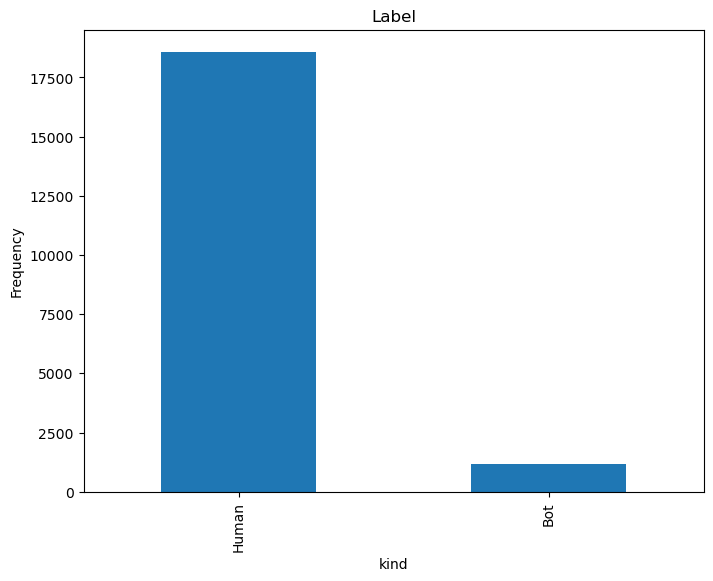

In [8]:
import matplotlib.pyplot as plt

# 可视化bot和hunman类型的情况
counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Label')
plt.xlabel('kind')
plt.ylabel('Frequency')
plt.show()

由柱状图可以得出人类账号远大于机器人账号

C:\Users\89172\AppData\Local\Temp\ipykernel_9636\971735939.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_bot['created_at'], shade=True)
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


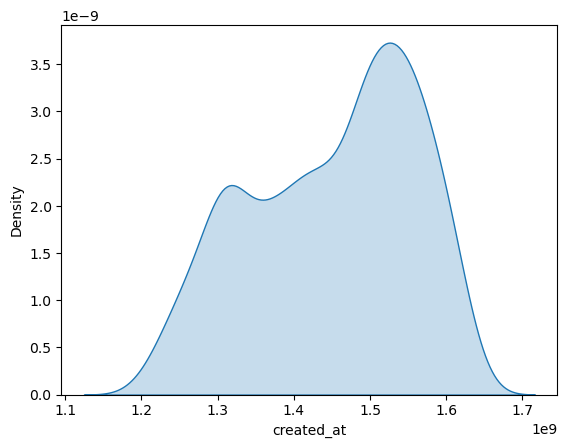

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# 可视化bot类型账号的created_at情况

df_bot = data[data['label'] == 'Bot']
sns.kdeplot(df_bot['created_at'], shade=True)
plt.show()



由密度图，创建账户数量一开始较少，但随时间增加，创建账户的数量的速度也在增加。

C:\Users\89172\AppData\Local\Temp\ipykernel_9636\1190001202.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_bot['created_at'], shade=True)
c:\Users\89172\anaconda3\envs\tmp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


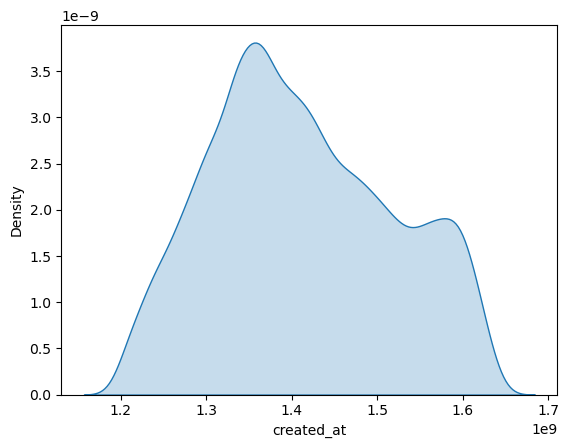

In [10]:
# 可视化human类型账号的created_at情况
import seaborn as sns
import matplotlib.pyplot as plt
# 可视化Human类型账号的created_at情况

df_bot = data[data['label'] == 'Human']
sns.kdeplot(df_bot['created_at'], shade=True)
plt.show()

human账户创建速度先增后减

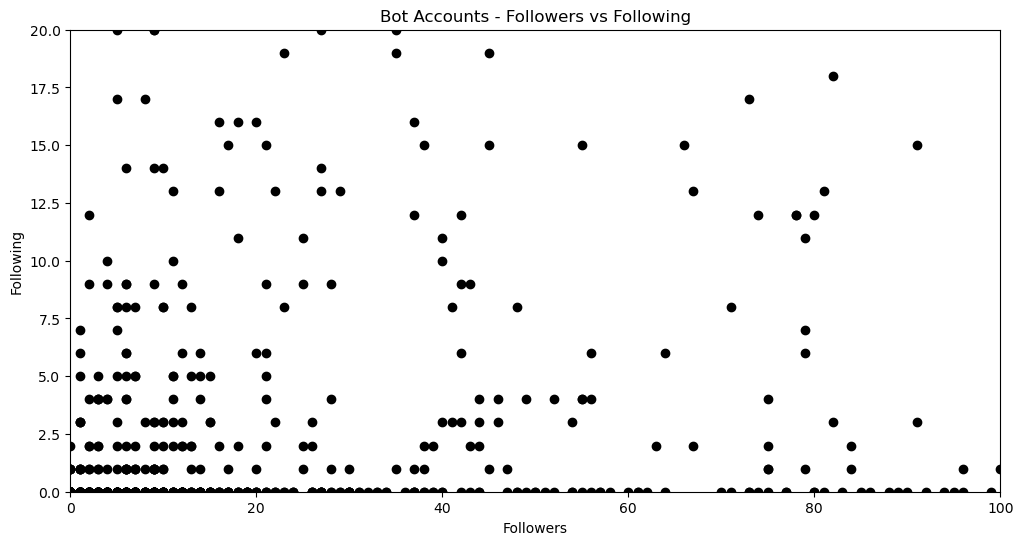

In [18]:
# 可视化bot类型账号的followers和following情况
import seaborn as sns
import matplotlib.pyplot as plt

df_bot = data[data['label'] == 'Bot']

plt.figure(figsize=(12, 6))
plt.scatter(df_bot['followers'], df_bot['following'], color='black', alpha=1)
plt.xlabel('Followers')
plt.ylabel('Following')
plt.title('Bot Accounts - Followers vs Following')
plt.xlim(0, 100)
plt.ylim(0, 20)
plt.show()

对bot类型的follwer和following进行统计分析,舍弃一些过大值，画出散点图，大多数bot关注者很多，但被关注的人很少。

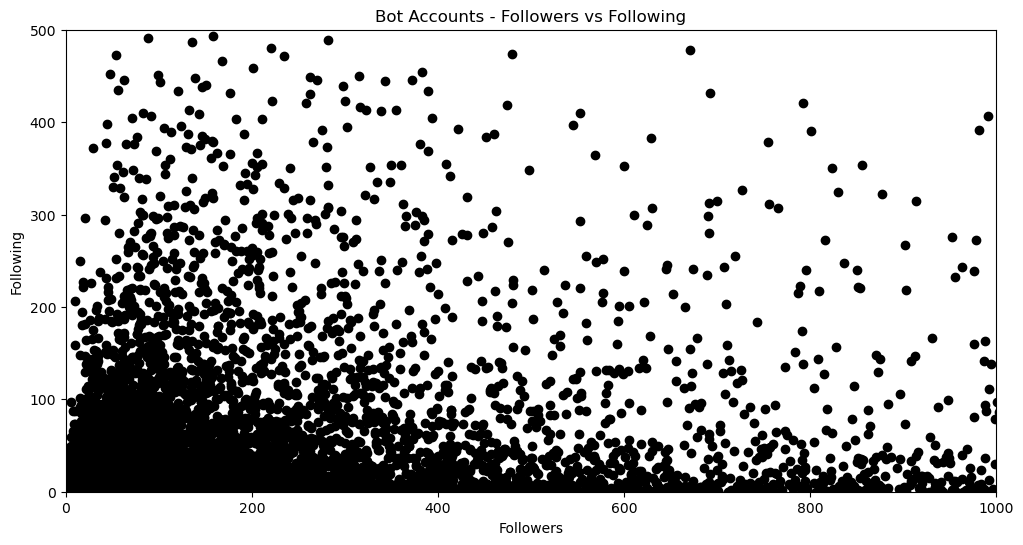

In [20]:
# 可视化human类型账号的followers和following情况
import seaborn as sns
import matplotlib.pyplot as plt

df_bot = data[data['label'] == 'Human']

plt.figure(figsize=(12, 6))
plt.scatter(df_bot['followers'], df_bot['following'], color='black', alpha=1)
plt.xlabel('Followers')
plt.ylabel('Following')
plt.title('Bot Accounts - Followers vs Following')
plt.xlim(0, 1000)
plt.ylim(0, 500)
plt.show()

人类账户分布比较全面，说明既有被关注的，也有关注别人的